In [163]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git

fatal: destination path 'algorithmic_complexity' already exists and is not an empty directory.


##DIFERENCIA ENTRE ALGORITMOS
La principal diferencia que existe entre estos algoritmos es que "Johnson" es más efectivo con grafos dispersos y "Floyd-Warshall" es más efectivo con grafos densos.
Para mayor comprensión pasare a definir que son cada uno de estos tipos de grafos:
  1. Grafo dispersos: Es aquel grafo en donde su número de aristas se aleja al máximo posible de aristas que puede tener el grafo.
  2. Grafo denso: Es aquel grafo en donde su número de aristas se acerca al máximo posible de aristas que puede tener el grafo.
  3. El máximo número de aristas que puede tener un grafo es N * (N - 1) donde N es el número de nodos del grafo

In [148]:
from algorithmic_complexity.aclib import graphstuff as gs
import networkx as nx
import heapq as hq
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [164]:
%%file 1.txt
0 3 2
1 0 6
1 2 3
2 0 4
2 3 5
3 1 -7
3 2 -3
4 3 6
4 5 3
5 5 3
5 6 4
6 5 9
6 7 2
7 6 4
7 8 3
8 7 8
8 9 6
9 8 6
9 10 4
10 9 2
10 11 3
11 10 5
11 12 -5
12 11 -7
12 13 -5
13 12 -7
13 14 -6
14 13 -5
14 15 -7
15 14 9
15 16 8
16 15 3
16 17 4
17 16 5
17 17 6
18 17 7
18 19 8
19 18 9
19 20 3
20 19 3
20 21 -3
21 20 -4
21 22 -5
22 21 -6
22 23 -7
23 22 -8
23 24 -9
24 23 -2
24 25 5
24 24 6
25 26 7
25 25 8
26 25 9
26 27 5
27 26 4
27 28 6
28 27 7
28 29 9
29 28 3
29 30 2
30 29 9
30 0 9


Overwriting 1.txt


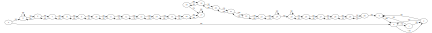

In [165]:
G2 = nx.read_weighted_edgelist("1.txt", create_using=nx.DiGraph, nodetype=int)
gs.nx2gv(G2, weighted=True)

In [167]:
def relax(G, u, v):
  g_u = G.nodes[u]["cost"]
  g_v = G.nodes[v]["cost"]
  w_uv = G.edges[u, v]["weight"]
  if g_u + w_uv < g_v:
    G.nodes[v]["cost"] = g_u + w_uv
    G.nodes[v]["path"] = u
    return True
  return False

In [168]:
def bellmanFord(G, s):
  n = G.number_of_nodes()
  for u in G.nodes:
    G.nodes[u]["cost"] = math.inf
    G.nodes[u]["path"] = -1

  G.nodes[s]["cost"] = 0

  for _ in range(n - 1):
    for u, v in G.edges:
      relax(G, u, v)

  for u, v in G.edges:
    if relax(G, u, v):
      return False
  return True

In [169]:
def dijkstra(G, s):
  for u in G.nodes:
    G.nodes[u]['visited'] = False
    G.nodes[u]['path']    = -1
    G.nodes[u]['cost']    = math.inf

  G.nodes[s]['cost'] = 0
  q = [(0, s)]
  while q:
    g_u, u = hq.heappop(q)
    if not G.nodes[u]['visited']:
      G.nodes[u]['visited'] = True
      for v in G.neighbors(u):
        if not G.nodes[v]['visited']:
          if relax(G, u, v):
            hq.heappush(q, (G.nodes[v]["cost"], v))

  path = [0]*G.number_of_nodes()
  for v, info in G.nodes.data():
    path[v] = info['path']

  return path

In [170]:
def johnsson(G):
  n = G.number_of_nodes()
  G2 = G.copy()

  G2.add_node(n)
  G2.add_edge(n, n-1, weight=0)

  if not bellmanFord(G2, n): # Ciclo negativo
    return None

  G3 = G.copy()
  for u, v in G3.edges:
    C_uv = G.edges[u, v]["weight"]
    P_u = G2.nodes[u]["cost"]
    P_v = G2.nodes[v]["cost"]
    G3.edges[u, v]["weight"] = C_uv + P_u - P_v

  path = []
  for u in range(n):
    path.append(dijkstra(G3, u))

  #tamanio = len(path)
  #while tamanio != 0:
  #  print(path[tamanio-1])
  #  tamanio -= 1
  #for i in len(path):
  #  print(path[i])
  return path

In [171]:
johnsson(G2)

[[-1,
  3,
  1,
  0,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1],
 [1,
  -1,
  1,
  2,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1],
 [2,
  3,
  -1,
  2,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1],
 [1,
  3,
  1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1],
 [-1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1],
 [-1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,

#FLOYD WARSHALL

In [145]:
def relax(cost, path, cost_uv, path_kj, u, v):
  if cost[u] + cost_uv < cost[v]:
    cost[v] = cost[u] + cost_uv
    path[v] = path_kj

def floydWarshall(G):
  n = len(G)
  cost = G.copy()
  path = np.full((n, n), -1)

  for (i, j), _ in np.ndenumerate(path):
    path[i, j] = i if G[i, j] != np.Inf else -1;

  for k in range(n):
    for i in range(n):
      for j in range(n):
        if i != j and i != k and k != j:
          relax(cost[i], path[i], cost[k, j], path[k, j], k, j)
  
  return cost, path

In [146]:
%%file 1.adjmatrix
0 5 0 0 0 0 0 0
0 0 1 4 0 0 0 0
0 9 0 0 6 0 5 0
0 8 0 0 0 8 0 0
0 0 0 0 0 0 7 1
0 9 0 2 0 0 5 0
0 0 0 0 4 0 0 0
0 0 0 0 0 5 6 0

Writing 1.adjmatrix


In [149]:
G = np.fromfile("1.adjmatrix", sep=" ").reshape((8, 8))
G[G == 0] = np.Inf
G

array([[inf,  5., inf, inf, inf, inf, inf, inf],
       [inf, inf,  1.,  4., inf, inf, inf, inf],
       [inf,  9., inf, inf,  6., inf,  5., inf],
       [inf,  8., inf, inf, inf,  8., inf, inf],
       [inf, inf, inf, inf, inf, inf,  7.,  1.],
       [inf,  9., inf,  2., inf, inf,  5., inf],
       [inf, inf, inf, inf,  4., inf, inf, inf],
       [inf, inf, inf, inf, inf,  5.,  6., inf]])

In [162]:
cost, path = floydWarshall(G)
print(cost)
print(path)

[[inf  5.  6.  9. 12. 17. 11. 13.]
 [inf inf  1.  4.  7. 12.  6.  8.]
 [inf  9. inf 13.  6. 12.  5.  7.]
 [inf  8.  9. inf 15.  8. 13. 16.]
 [inf 15. 16.  8. inf  6.  7.  1.]
 [inf  9. 10.  2.  9. inf  5. 10.]
 [inf 19. 20. 12.  4. 10. inf  5.]
 [inf 14. 15.  7. 10.  5.  6. inf]]
[[-1  0  1  1  2  3  2  4]
 [-1 -1  1  1  2  3  2  4]
 [-1  2 -1  1  2  7  2  4]
 [-1  3  1 -1  2  3  5  4]
 [-1  5  1  5 -1  7  4  4]
 [-1  5  1  5  6 -1  5  4]
 [-1  5  1  5  6  7 -1  4]
 [-1  5  1  5  6  7  7 -1]]


##Diferencia entre los 2 algoritmos en terminos de tiempo y espacio
1. Johnson: su complejidad algoritmica es logaritmica
2. Floyd Warshall: su complejidad algoritmica es cúbica
